In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("state_wide_normal_ev_vehicles_persentage.csv")

In [3]:
df.head()

,Sl No,State/UT,Total Vehicles Registered,Total Electric Vehicles Registered,Percentage of Electric Vehicles
0,1,Andaman & Nicobar Islands,160375,186,0.12
1,2,Andhra Pradesh,16517516,66500,0.40
2,3,Arunachal Pradesh,299371,25,0.01
3,4,Assam,5393542,116605,2.16
4,5,Bihar,11728184,155457,1.33


In [4]:
###Exploratory Data Analysis#####

In [5]:
df.columns

Index(['Sl No', 'State/UT', 'Total Vehicles Registered',
       'Total Electric Vehicles Registered',
       'Percentage of Electric Vehicles'],
      dtype='object')

In [6]:
df.dtypes

Sl No                                   int64
State/UT                               object
Total Vehicles Registered               int64
Total Electric Vehicles Registered      int64
Percentage of Electric Vehicles       float64
dtype: object

In [7]:
df.isnull().sum()

Sl No                                 0
State/UT                              0
Total Vehicles Registered             0
Total Electric Vehicles Registered    0
Percentage of Electric Vehicles       0
dtype: int64

In [8]:
df.shape

(34, 5)

In [9]:
df.duplicated().sum()

0

In [10]:
df['Percentage of Electric Vehicles'].value_counts()

Percentage of Electric Vehicles
0.01    2
1.33    2
0.56    2
0.50    2
0.03    2
0.12    1
0.86    1
1.27    1
0.09    1
2.02    1
0.53    1
0.02    1
0.93    1
0.26    1
0.33    1
0.22    1
0.57    1
0.47    1
0.15    1
0.40    1
0.80    1
0.11    1
0.59    1
1.01    1
2.71    1
0.71    1
0.90    1
2.16    1
0.45    1
Name: count, dtype: int64

In [11]:
df['Total Vehicles Registered'].value_counts()

Total Vehicles Registered
160375      1
13175075    1
554096      1
511744      1
349287      1
414439      1
10637750    1
1329787     1
18914170    1
16517516    1
108442      1
31643747    1
711282      1
372133      1
3626246     1
43943230    1
34371551    1
19604968    1
43757       1
16643512    1
29855843    1
7056955     1
2048212     1
2145062     1
12092054    1
22799866    1
1204110     1
8457200     1
7431353     1
843049      1
11728184    1
5393542     1
299371      1
15020616    1
Name: count, dtype: int64

In [12]:
df['Total Electric Vehicles Registered'].value_counts()

Total Electric Vehicles Registered
186       1
34162     1
1198      1
129       1
114       1
60        1
60097     1
4421      1
175595    1
66500     1
20        1
167216    1
14379     1
345       1
48250     1
556629    1
296885    1
92388     1
65        1
94346     1
239948    1
35331     1
10225     1
2362      1
67812     1
134273    1
12139     1
229305    1
52813     1
7628      1
155457    1
116605    1
25        1
67111     1
Name: count, dtype: int64

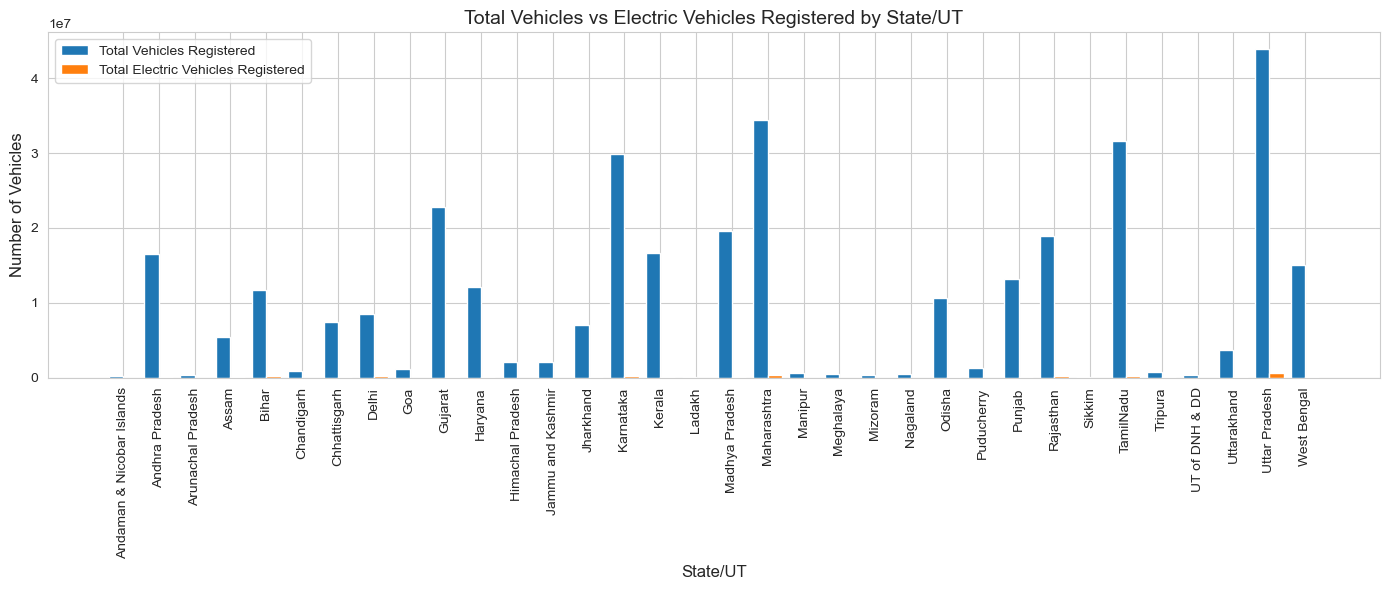

In [138]:
# Plotting the bar graph
fig, ax = plt.subplots(figsize=(14, 6))

bar_width = 0.4
index = np.arange(len(df))

bar1 = ax.bar(index, df['Total Vehicles Registered'], bar_width, label='Total Vehicles Registered')
bar2 = ax.bar(index + bar_width, df['Total Electric Vehicles Registered'], bar_width, label='Total Electric Vehicles Registered')

# Adding labels
ax.set_xlabel('State/UT', fontsize=12)
ax.set_ylabel('Number of Vehicles', fontsize=12)
ax.set_title('Total Vehicles vs Electric Vehicles Registered by State/UT', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['State/UT'], rotation=90, fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()

**Uttar Pradesh has the highest number of electric vehicles registered with 556,629**

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl No,34.0,1.750000e+01,9.958246e+00,1.00,9.2500,17.500,25.75,34.00
Total Vehicles Registered,34.0,1.000025e+07,1.160720e+07,43757.00,593392.5000,6225248.500,16143291.00,43943230.00
Total Electric Vehicles Registered,34.0,8.070644e+04,1.159819e+05,20.00,1489.0000,41790.500,111040.25,556629.00
Percentage of Electric Vehicles,34.0,6.629412e-01,6.472718e-01,0.01,0.1675,0.515,0.89,2.71


In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Total Vehicles Registered', 'Total Electric Vehicles Registered']])


In [23]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


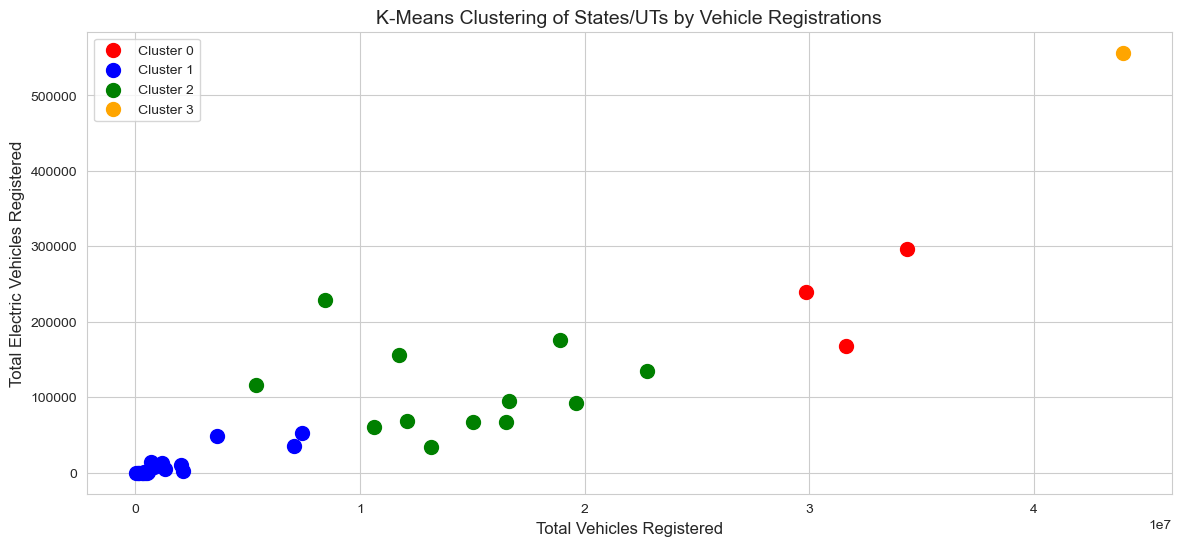

In [139]:
# Plotting the clusters
plt.figure(figsize=(14, 6))
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    plt.scatter(df[df['Cluster'] == i]['Total Vehicles Registered'], 
                df[df['Cluster'] == i]['Total Electric Vehicles Registered'], 
                s=100, c=colors[i], label=f'Cluster {i}')

plt.xlabel('Total Vehicles Registered', fontsize=12)
plt.ylabel('Total Electric Vehicles Registered', fontsize=12)
plt.title('K-Means Clustering of States/UTs by Vehicle Registrations', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
***************************************************

In [25]:
data=pd.read_csv("Ev_Sales(1).csv")

In [26]:
data.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,Apr-17,96.0,4748.0,198.0,0.0,5042.0
1,May-17,91.0,6720.0,215.0,2.0,7028.0
2,Jun-17,137.0,7178.0,149.0,1.0,7465.0
3,Jul-17,116.0,8775.0,120.0,0.0,9011.0
4,Aug-17,99.0,8905.0,137.0,0.0,9141.0


In [21]:
data.columns

Index(['YEAR', '2 W', '3 W', '4 W', 'BUS', 'TOTAL'], dtype='object')

In [22]:
data.dtypes

YEAR      object
2 W      float64
3 W      float64
4 W      float64
BUS      float64
TOTAL    float64
dtype: object

In [23]:
data.isnull().sum()

YEAR     1
2 W      1
3 W      1
4 W      1
BUS      1
TOTAL    1
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(34, 5)

In [26]:
df.duplicated().sum()

0

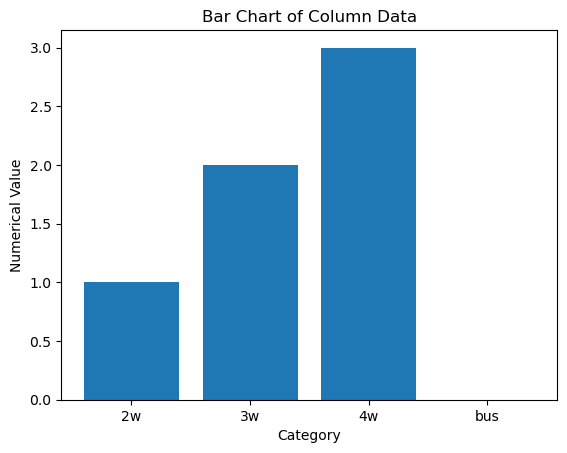

In [27]:
column_data = ["2w", "3w", "4w", "bus"]

# Mapping categorical data to numerical values
mapping = {"bus": 0, "2w": 1, "3w": 2, "4w": 3}
numerical_data = [mapping[item] for item in column_data]

# Plotting the bar chart
plt.bar(range(len(numerical_data)), numerical_data, tick_label=column_data)
plt.xlabel('Category')
plt.ylabel('Numerical Value')
plt.title('Bar Chart of Column Data')
plt.show()

**4 wheeler sales is high than 2 wheeler and 3 wheeler**

<Axes: >

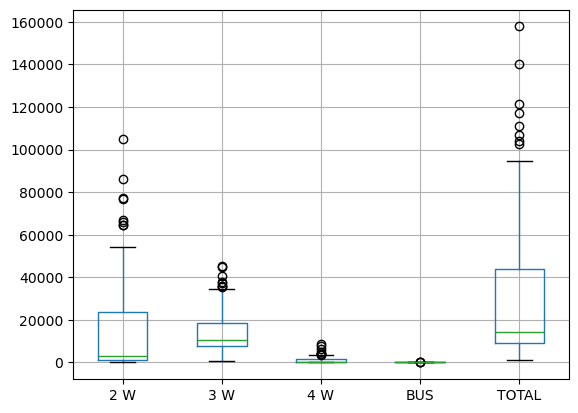

In [50]:
data.boxplot()

In [ ]:
****************************

In [36]:
df3=pd.read_csv("state_wide_ev_segment_vehicles_sales.csv")

In [37]:
df3.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


In [38]:
df3.columns

Index(['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other',
       'Grand Total'],
      dtype='object')

In [39]:
df3.dtypes

State Name                         object
Two Wheeler                         int64
Three Wheeler                     float64
Four Wheeler                        int64
Goods Vehicles                    float64
Public Service Vehicle            float64
Special Category Vehicles         float64
Ambulance/Hearses                 float64
Construction Equipment Vehicle    float64
Other                             float64
Grand Total                         int64
dtype: object

In [40]:
df3.isnull().sum()

State Name                         0
Two Wheeler                        0
Three Wheeler                      4
Four Wheeler                       0
Goods Vehicles                     4
Public Service Vehicle             8
Special Category Vehicles         23
Ambulance/Hearses                 27
Construction Equipment Vehicle    27
Other                              4
Grand Total                        0
dtype: int64

In [41]:
df3.shape

(33, 11)

In [42]:

df3.dropna(inplace=True)

In [43]:
df3.shape

(1, 11)

In [44]:
df3.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
32,Grand Total,282542,647186.0,26335,3036.0,2039.0,410.0,6.0,397.0,4412.0,966363


In [ ]:
**********************************

In [87]:
df4=pd.read_csv("ev sales by statewide with charging stations.csv")

In [88]:
df4.head()

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,NaN
1,1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,NaN
2,2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0
3,3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0
4,4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0


In [89]:
df4.columns

Index(['Unnamed: 0', 'State Name', 'Two Wheeler', 'Three Wheeler',
       'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle',
       'Special Category Vehicles', 'Ambulance/Hearses',
       'Construction Equipment Vehicle', 'Other', 'Grand Total',
       'total-charging-stations'],
      dtype='object')

In [90]:
df4.dtypes

Unnamed: 0                          int64
State Name                         object
Two Wheeler                         int64
Three Wheeler                     float64
Four Wheeler                        int64
Goods Vehicles                    float64
Public Service Vehicle            float64
Special Category Vehicles         float64
Ambulance/Hearses                 float64
Construction Equipment Vehicle    float64
Other                             float64
Grand Total                         int64
total-charging-stations           float64
dtype: object

In [56]:
df4.duplicated().sum()

0

In [91]:
df4.isnull().sum()

Unnamed: 0                        0
State Name                        0
Two Wheeler                       0
Three Wheeler                     0
Four Wheeler                      0
Goods Vehicles                    0
Public Service Vehicle            0
Special Category Vehicles         0
Ambulance/Hearses                 0
Construction Equipment Vehicle    0
Other                             0
Grand Total                       0
total-charging-stations           8
dtype: int64

In [92]:
df4.shape

(32, 13)

In [98]:
df4['total-charging-stations']=df4['total-charging-stations'].replace(np.nan,0)

In [99]:
continuous_features=[]
for i in df4.columns:
    if df4[i].dtypes=='float64':
        continuous_features.append(i)
print('continuous features: ',continuous_features)

continuous features:  ['Three Wheeler', 'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other', 'total-charging-stations']


In [100]:
for i in continuous_features:
    df4[i]=df4[i].astype('int64')

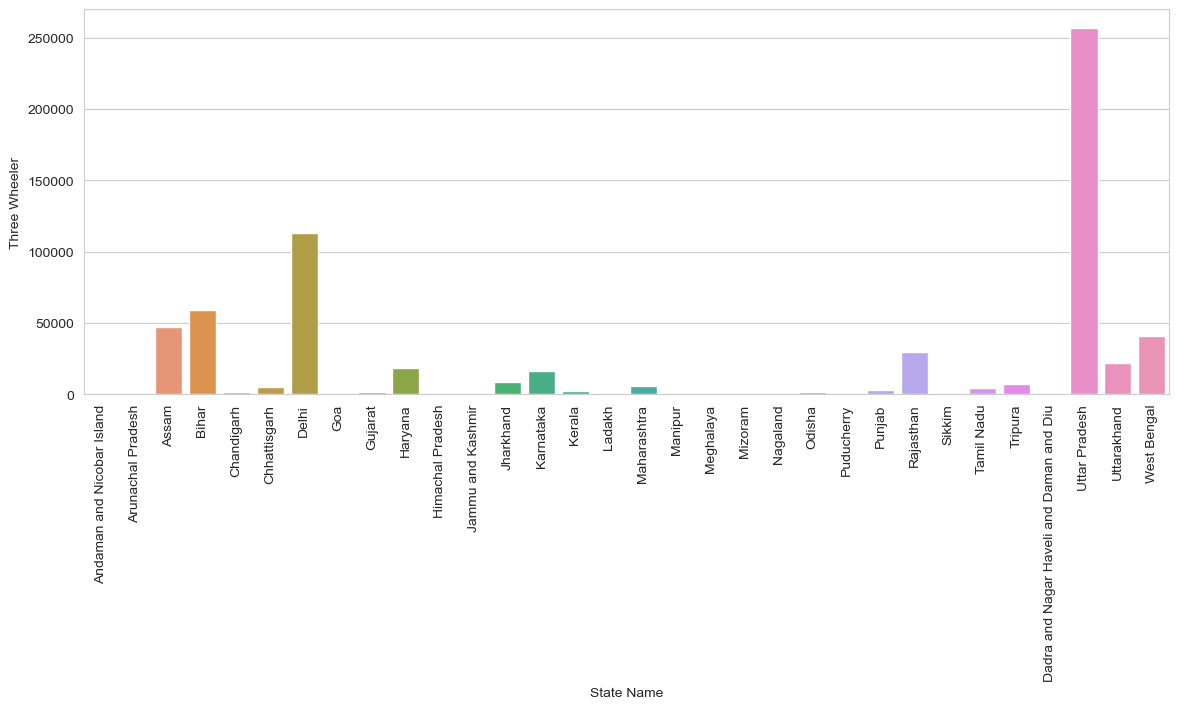

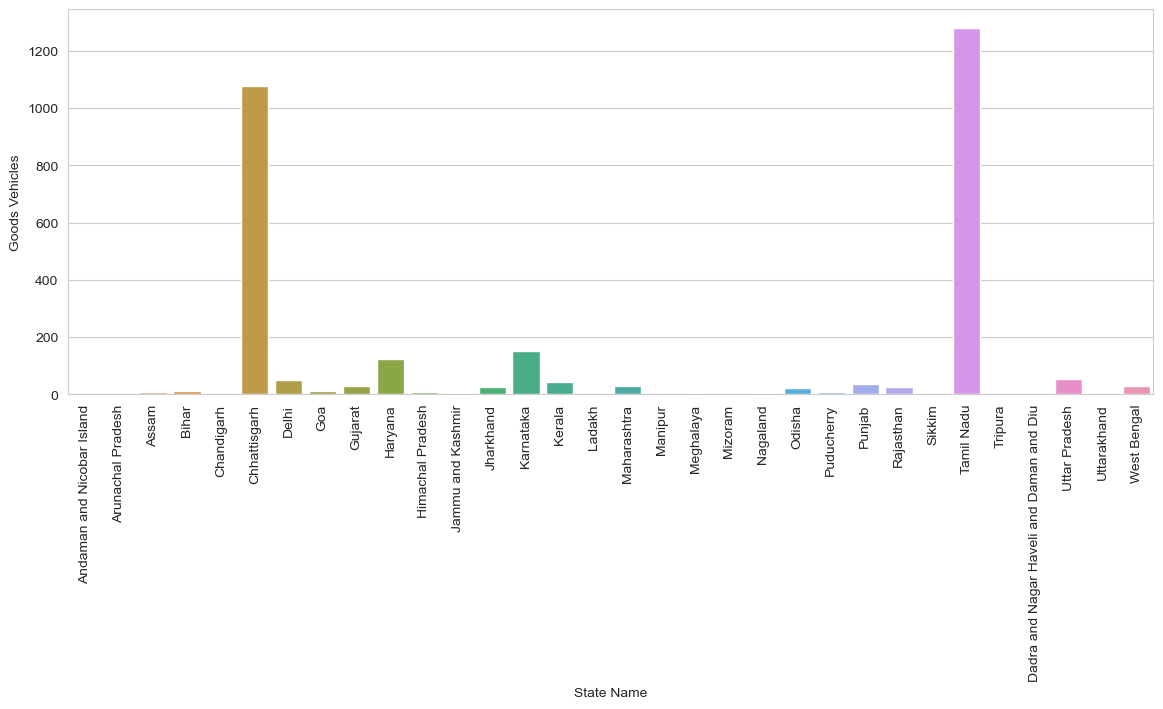

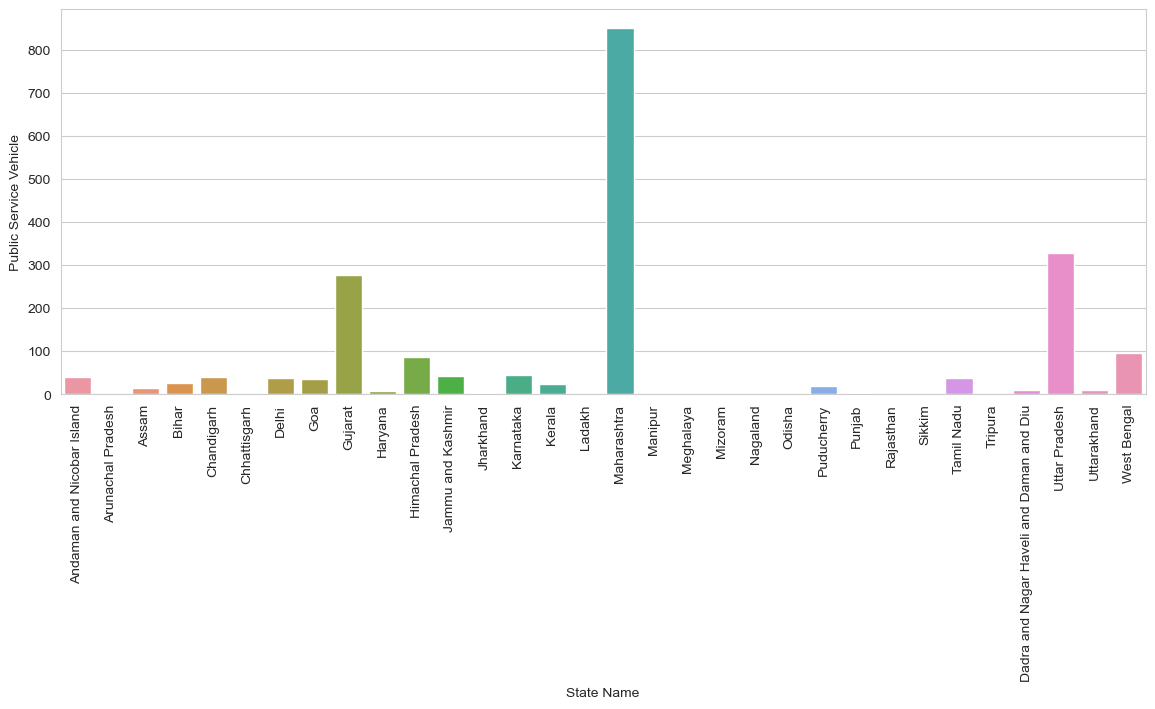

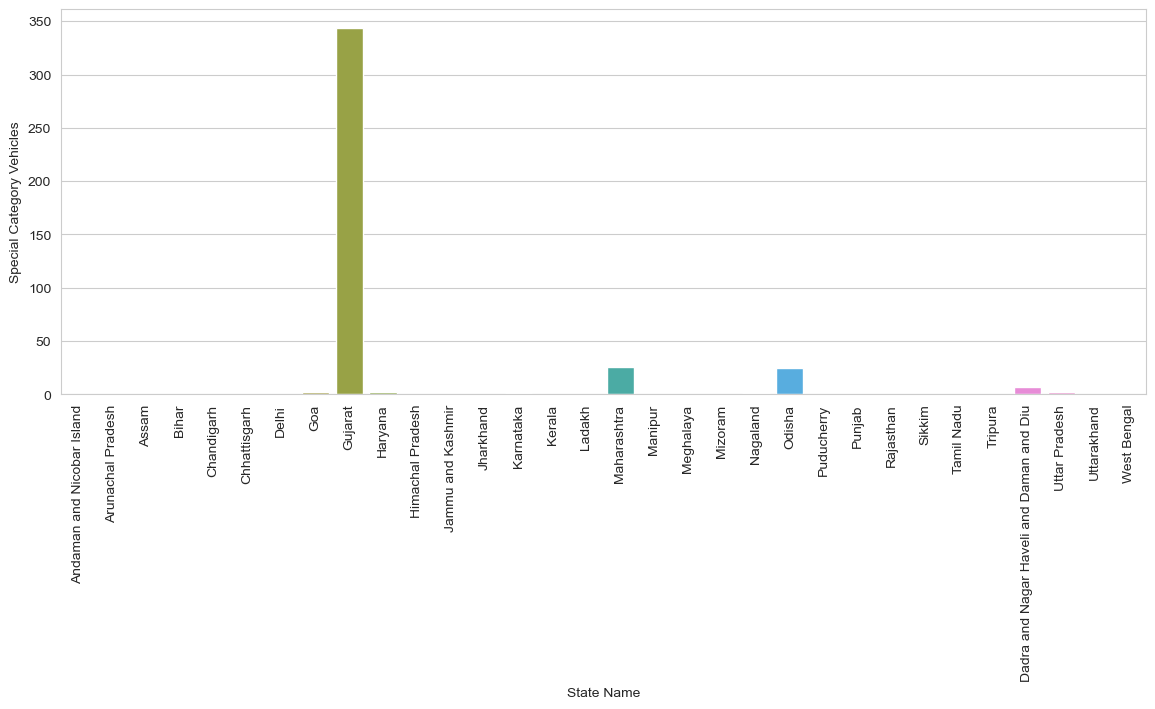

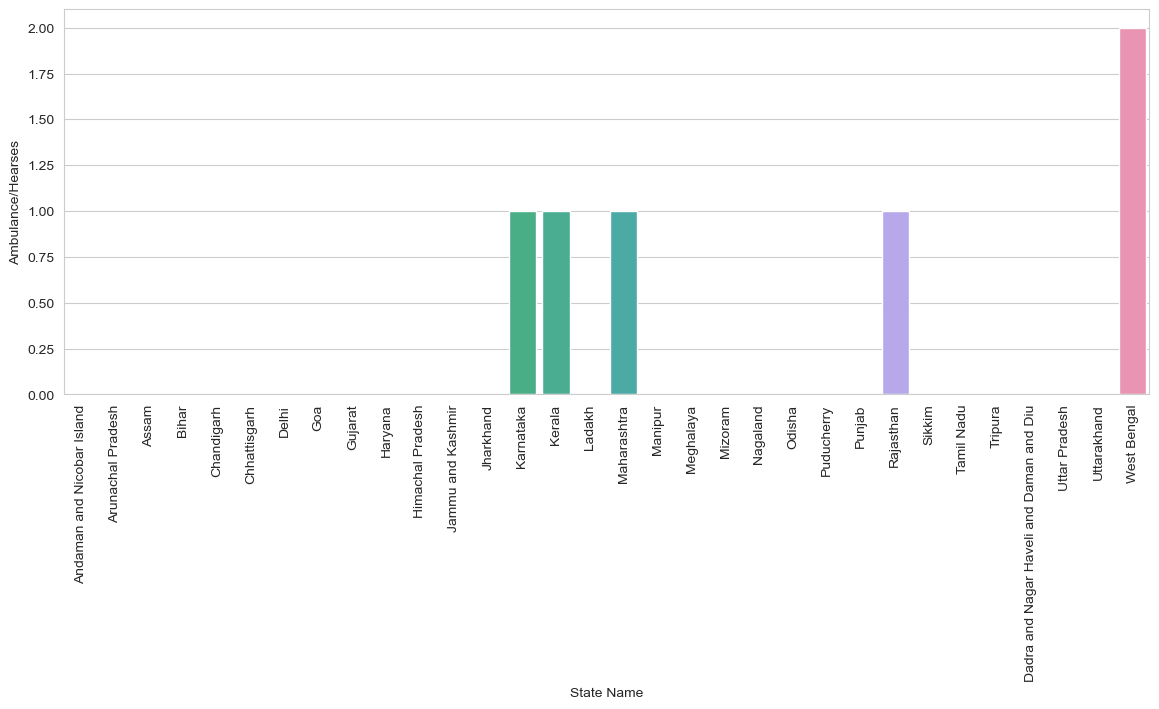

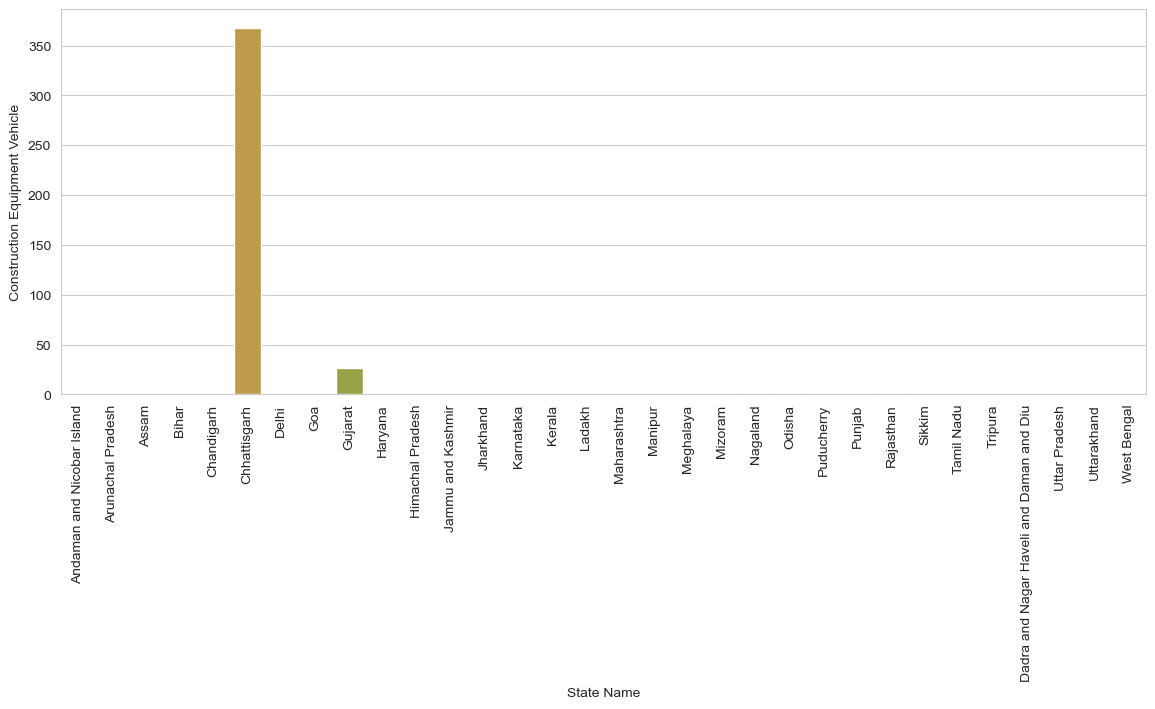

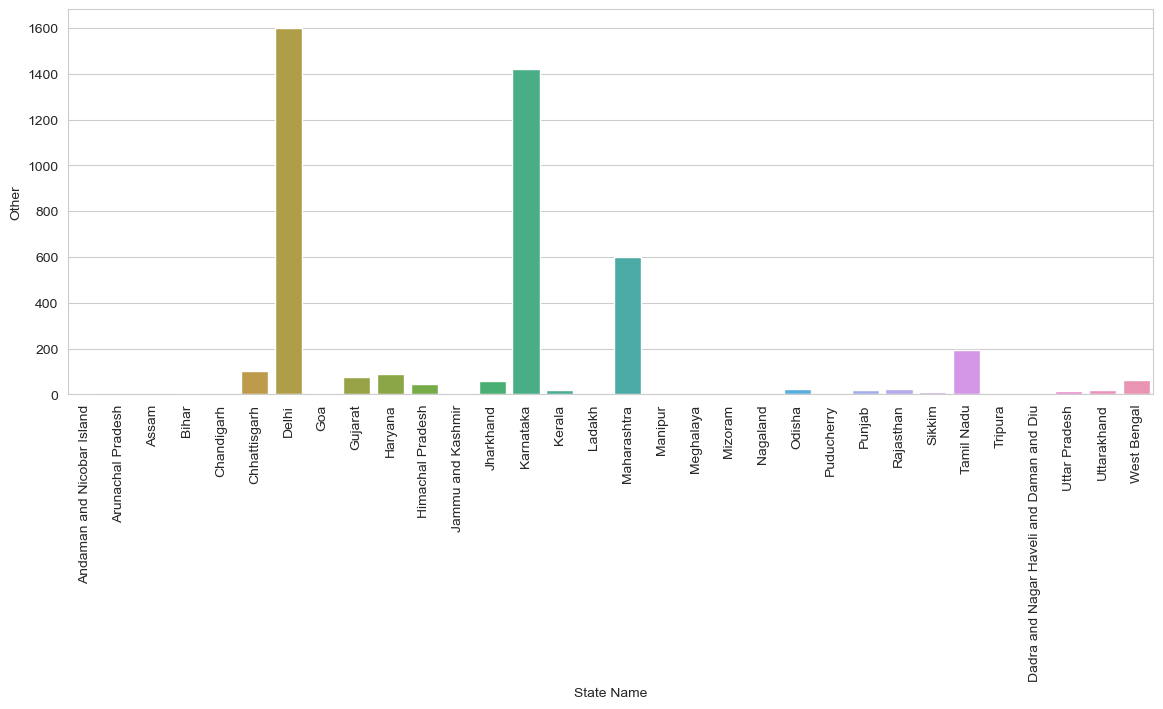

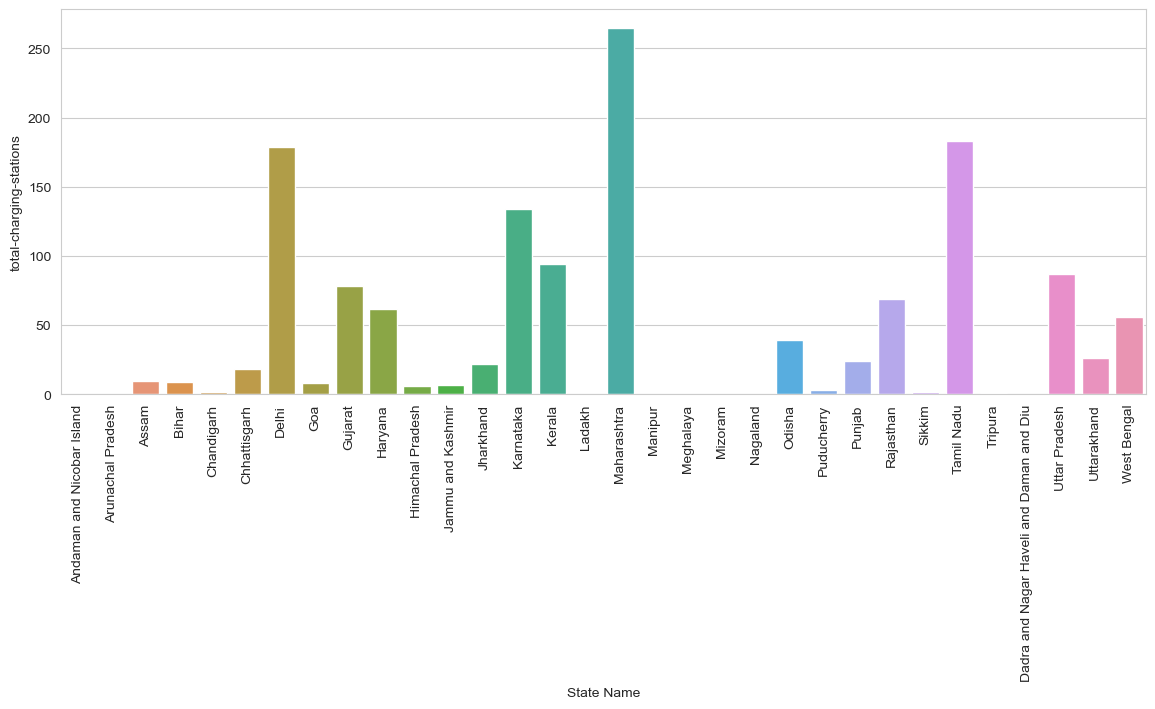

In [140]:
for i in continuous_features:
    plt.figure(figsize=(14,5))
    sns.set_style('whitegrid')
    sns.barplot(x=df4['State Name'],y=df4[i])
    plt.xticks(rotation=90)
    plt.show()

In [103]:
# Drop non-numeric columns if any
numeric_df4 = df4.drop(columns=['State Name'])

In [104]:
# Handle missing values by filling them with zeros
numeric_df4.fillna(0, inplace=True)

In [105]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df4)

In [106]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [107]:
# Add cluster labels to the DataFrame
df4['Cluster'] = kmeans.labels_

In [108]:
print(df)

    Sl No                   State/UT  Total Vehicles Registered  \
0       1  Andaman & Nicobar Islands                     160375   
1       2             Andhra Pradesh                   16517516   
2       3          Arunachal Pradesh                     299371   
3       4                      Assam                    5393542   
4       5                      Bihar                   11728184   
5       6                 Chandigarh                     843049   
6       7               Chhattisgarh                    7431353   
7       8                      Delhi                    8457200   
8       9                        Goa                    1204110   
9      10                    Gujarat                   22799866   
10     11                    Haryana                   12092054   
11     12           Himachal Pradesh                    2145062   
12     13          Jammu and Kashmir                    2048212   
13     14                  Jharkhand                    705695

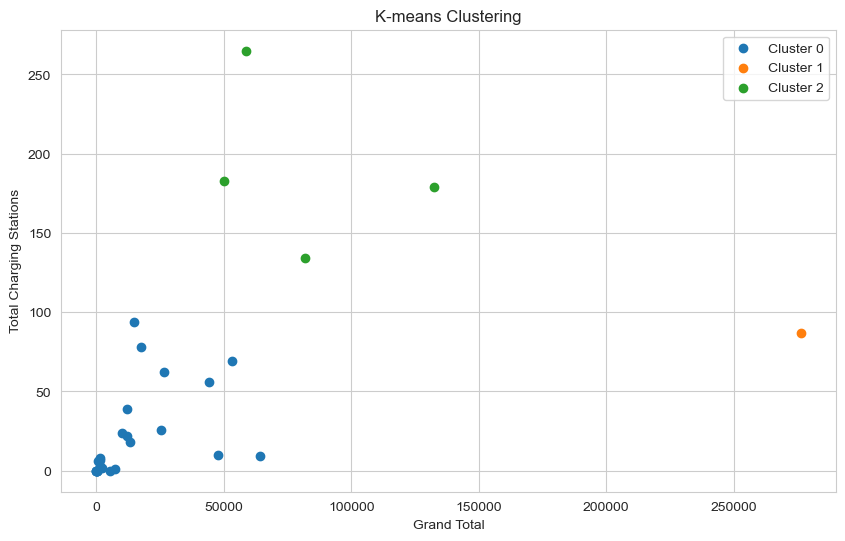

In [109]:
# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = df4[df4['Cluster'] == cluster]
    plt.scatter(cluster_data['Grand Total'], cluster_data['total-charging-stations'], label=f'Cluster {cluster}')
plt.title('K-means Clustering')
plt.xlabel('Grand Total')
plt.ylabel('Total Charging Stations')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
*****************************************************

In [29]:

df5=pd.read_csv('ev stations sanctioned at highways.csv',encoding='cp1252')

In [30]:
df5.head()

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,10
1,2,Expressways,Ahmadabad - Vadodara,10
2,3,Expressways,Delhi Agra Yamuna,20
3,4,Expressways,Bengaluru Mysore,14
4,5,Expressways,Bangaluru-Chennai,30


In [31]:
df5.columns

Index(['Sl. No', 'Category', 'Expressways/Highways',
       'EV Charging Stations Sanctioned'],
      dtype='object')

In [32]:
df5.dtypes

Sl. No                             object
Category                           object
Expressways/Highways               object
EV Charging Stations Sanctioned     int64
dtype: object

In [33]:
df5.isnull().sum()

Sl. No                             0
Category                           0
Expressways/Highways               0
EV Charging Stations Sanctioned    0
dtype: int64

In [34]:
df5.duplicated().sum()

0

In [40]:
categories = ["Expressways", "Highways"]
expressway_counts = [10, 10, 20, 14, 30, 30, 40, 14, 16]
highway_counts = [80, 160, 80, 44, 124, 60, 70, 100, 44, 120, 76, 120, 74, 62, 114, 64]

In [41]:
# Total EV charging stations
total_stations = sum(expressway_counts) + sum(highway_counts)

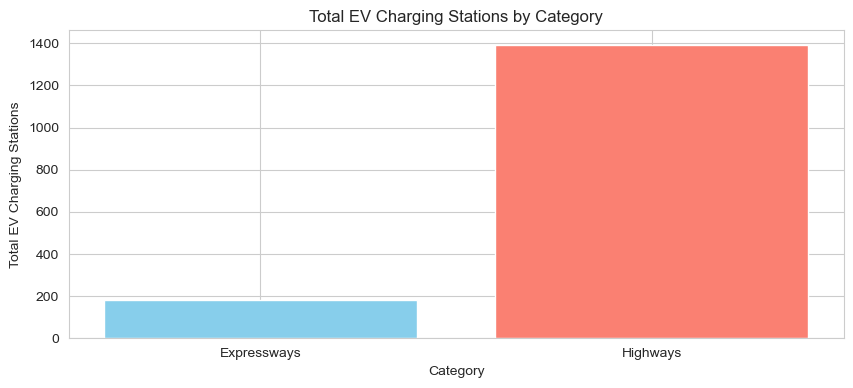

In [141]:
# Create a bar chart
plt.figure(figsize=(10, 4))
plt.bar(categories, [sum(expressway_counts), sum(highway_counts)], color=["skyblue", "salmon"])
plt.xlabel("Category")
plt.ylabel("Total EV Charging Stations")
plt.title("Total EV Charging Stations by Category")
plt.show()

**on highways more ev charging stations**

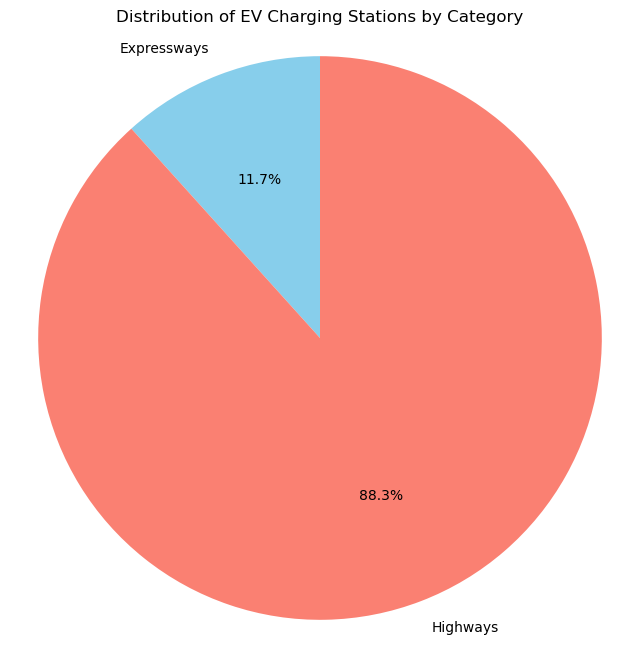

In [43]:
# Create a pie chart
plt.figure(figsize=(8, 8))
labels = ["Expressways", "Highways"]
sizes = [sum(expressway_counts), sum(highway_counts)]
colors = ["skyblue", "salmon"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of EV Charging Stations by Category")
plt.axis("equal")
plt.show()

In [44]:
print(f"Total EV Charging Stations: {total_stations}")

Total EV Charging Stations: 1576


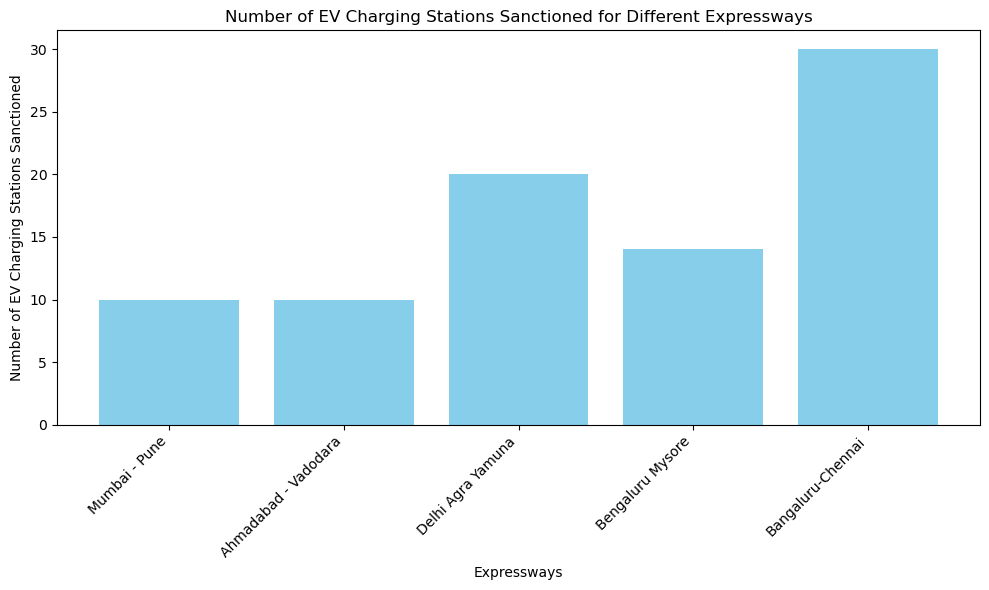

In [76]:
# Data
categories = ['Mumbai - Pune', 'Ahmadabad - Vadodara', 'Delhi Agra Yamuna', 'Bengaluru Mysore', 'Bangaluru-Chennai']
charging_stations = [10, 10, 20, 14, 30]

# Creating bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, charging_stations, color='skyblue')

# Adding title and labels
plt.title('Number of EV Charging Stations Sanctioned for Different Expressways')
plt.xlabel('Expressways')
plt.ylabel('Number of EV Charging Stations Sanctioned')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the chart
plt.tight_layout()
plt.show()


**on expressways ev charging station are on  Banglore-chennai is more**

In [47]:
data5 = {
    "Category": ["Expressways", "Highways"],
    "Charging_Stations": [1576, 0]  # Replace 0 with the total count for highways
}

df5 = pd.DataFrame(data5)
print(df5)

      Category  Charging_Stations
0  Expressways               1576
1     Highways                  0


In [48]:
# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2)
df5["Cluster"] = kmeans.fit_predict(df5[["Charging_Stations"]])
print(df5)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


      Category  Charging_Stations  Cluster
0  Expressways               1576        1
1     Highways                  0        0


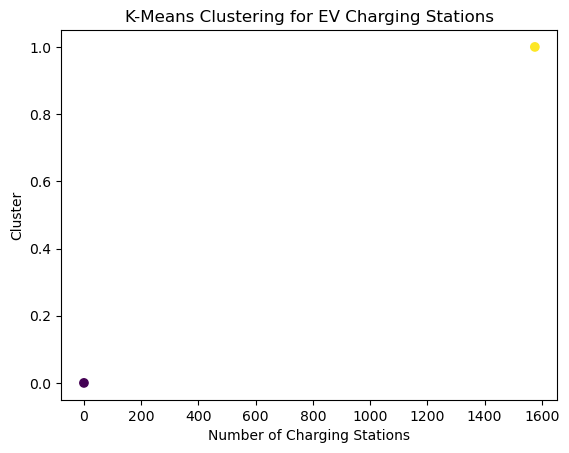

In [50]:
# Plot the data points
plt.scatter(df5["Charging_Stations"], df5["Cluster"], c=df5["Cluster"], cmap="viridis")
plt.xlabel("Number of Charging Stations")
plt.ylabel("Cluster")
plt.title("K-Means Clustering for EV Charging Stations")
plt.show()

In [ ]:
*******************************************

In [110]:
df6=pd.read_csv("EV_cars_India_2023.csv")

In [111]:
df6.head()

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,NaN


In [68]:
df6.columns

Index(['Car_name', 'Car_price', 'Batter_cap', 'Drive_range', 'Power',
       'Charge_time', 'transmission', 'Boot_space', 'Top_speed'],
      dtype='object')

In [69]:
df6.dtypes

Car_name        object
Car_price       object
Batter_cap      object
Drive_range     object
Power           object
Charge_time     object
transmission    object
Boot_space      object
Top_speed       object
dtype: object

In [70]:
df6.isnull().sum()

Car_name         0
Car_price        0
Batter_cap       3
Drive_range      0
Power            0
Charge_time      0
transmission     2
Boot_space      18
Top_speed       24
dtype: int64

In [71]:
df6.shape

(30, 9)

In [72]:
df6= df6.dropna()

In [73]:
df6.shape

(2, 9)

In [ ]:
************************************************

In [124]:
df7=pd.read_csv("2-wheeler-EV-bikewale.csv")

In [125]:
df7.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [126]:
df7.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name'],
      dtype='object')

In [127]:
df7.shape

(844, 14)

In [128]:
df7.isnull().sum()

review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64

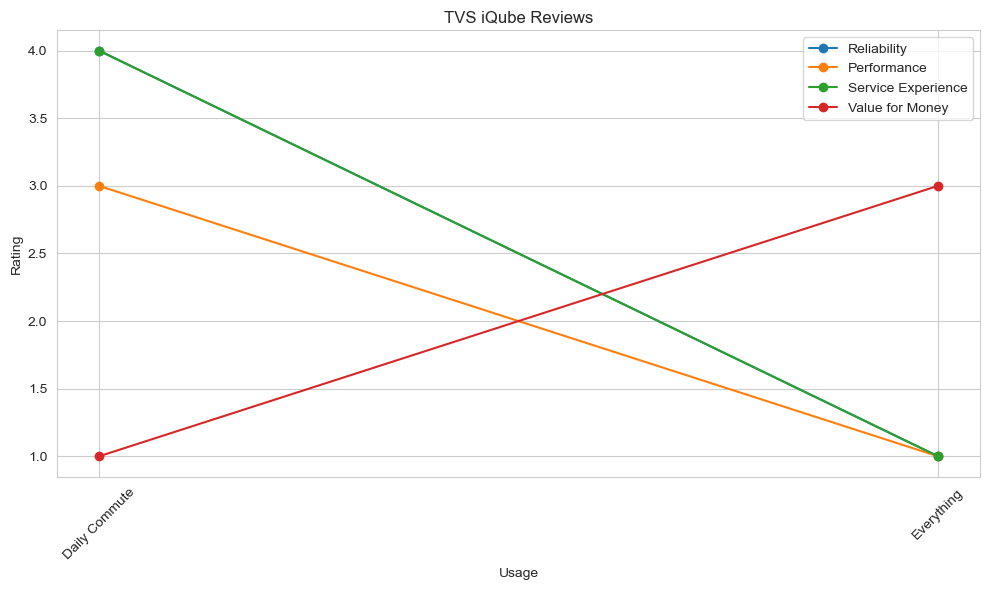

In [133]:
usage = ['Daily Commute', 'Everything']
reliability = [4, 1]
performance = [3, 1]
service_experience = [4, 1]
value_for_money = [1, 3]

#Plotting
plt.figure(figsize=(10, 6))

# Plotting lines
plt.plot(usage, reliability, marker='o', label='Reliability')
plt.plot(usage, performance, marker='o', label='Performance')
plt.plot(usage, service_experience, marker='o', label='Service Experience')
plt.plot(usage, value_for_money, marker='o', label='Value for Money')

# Adding labels and title
plt.xlabel('Usage')
plt.ylabel('Rating')
plt.title('TVS iQube Reviews')
plt.legend()

# Display plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**In this service and performance experience is high**